In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [5]:
os.chdir("../")
%pwd

'C:\\Users\\Lenovo\\Documents\\Masters_thesis'

# Whole genome

In [7]:
# Load the dataset
file_path = 'whole_genome_mutation_rate_1e6_rounded_without_duplicates.csv'
data = pd.read_csv(os.path.join("artifacts",file_path))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


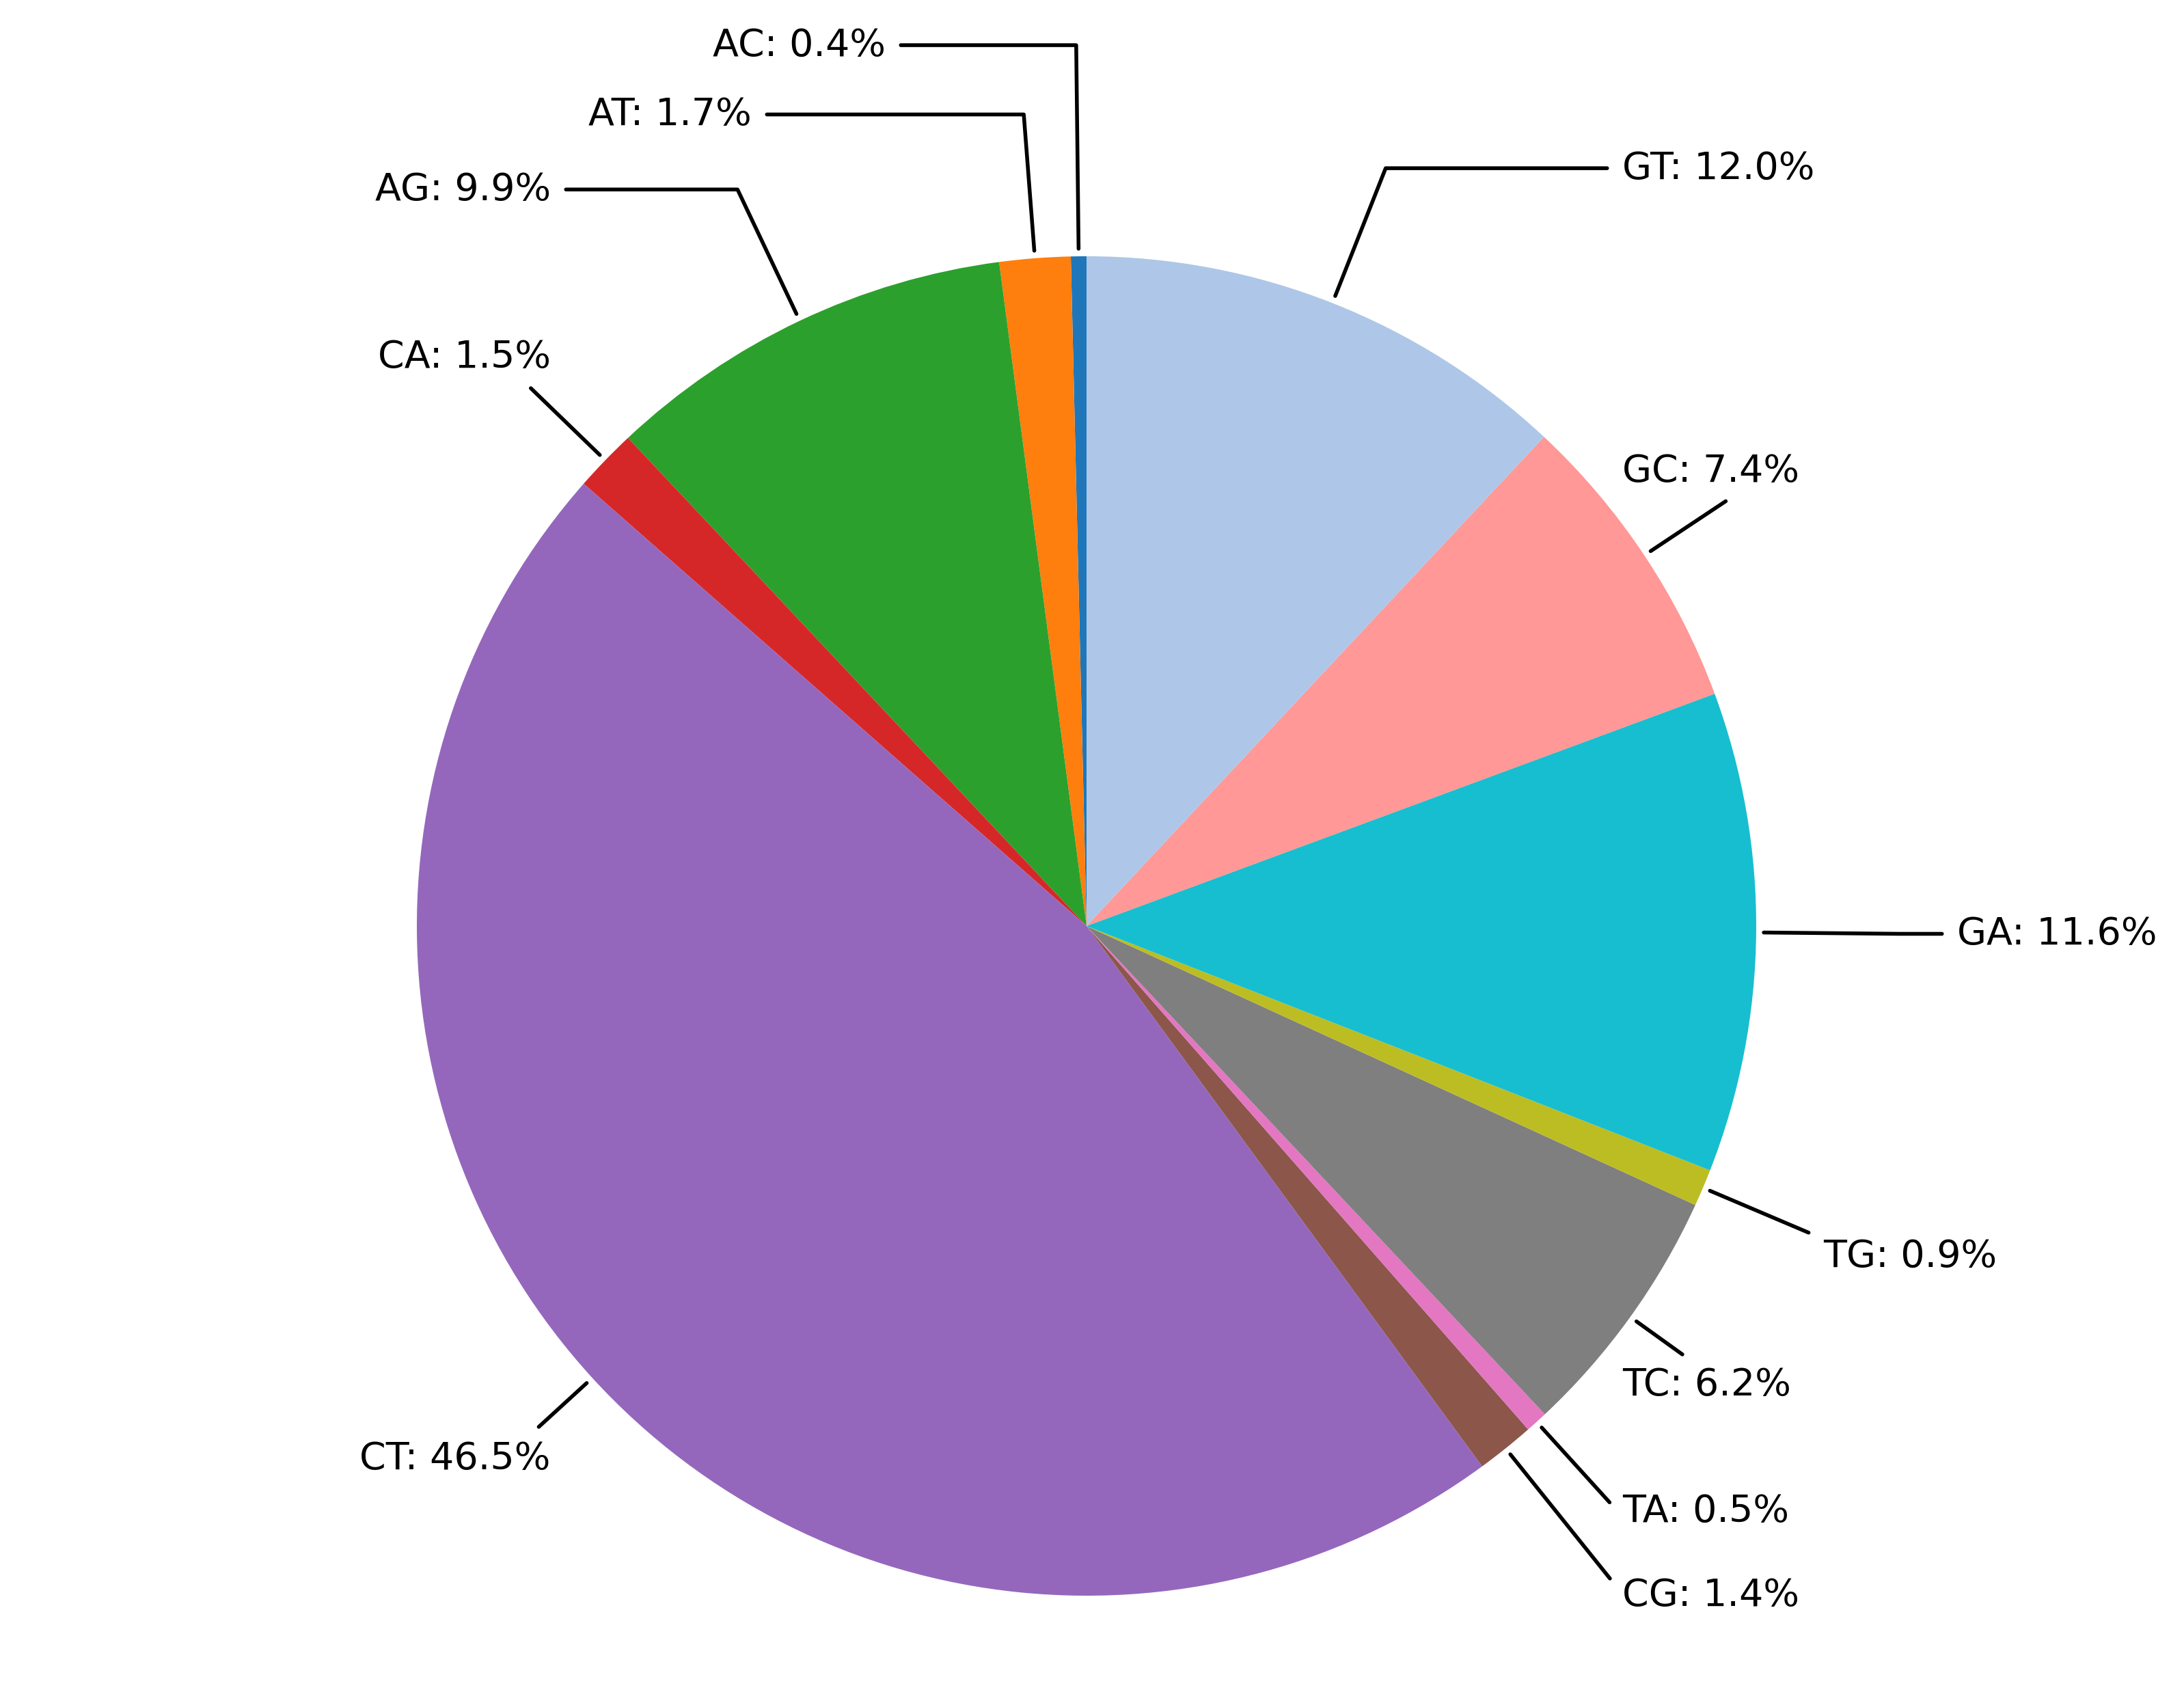

In [11]:
# Summing the values for each category across all rows
category_totals = data.sum()

# Creating a pie chart with customized legend placement and unique colors
fig, ax = plt.subplots(figsize=(10, 7), dpi=400)

# Create a color map with unique colors for each category
colors = ['#1f77b9', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896', '#aec7e8']

# Create the pie chart with wedges (without percentages inside the pie)
wedges, texts = ax.pie(
    category_totals,
    startangle=90,
    colors=colors
)

# Generate labels with percentages
labels = [f'{cat}: {pct:.1f}%' for cat, pct in zip(category_totals.index, 100.*category_totals/category_totals.sum())]

# Adjust the annotation positions and lines for specific categories
for i, (wedge, label) in enumerate(zip(wedges, labels)):
    ang = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    # Specific adjustments for "GA", "AC", and "AT"
    if label.startswith("GA"):
        xytext = (1.3*np.sign(x), 2.8*y)
    elif label.startswith("AC"):
        xytext = (0.3*np.sign(x), 1.3*y)
    elif label.startswith("AT"):
        xytext = (0.5*np.sign(x), 1.2*y)
    elif label.startswith("TG"):
        xytext = (1.1*np.sign(x), 1.3*y)
    elif label.startswith("CG"):
        xytext = (0.8*np.sign(x), 1.3*y)
    else:
        xytext = (0.8*np.sign(x), 1.2*y)

    ax.annotate(label, xy=(x, y), xytext=xytext,
                horizontalalignment=horizontalalignment,
                arrowprops=dict(arrowstyle="-", color='black',
                                connectionstyle=connectionstyle))

# Ensuring the pie is drawn as a circle
ax.axis('equal')

# Remove the default legend
ax.legend().remove()
plt.savefig(os.path.join("notebooks_7proteins","plots",'whole_genome_pie_chart.png'))
# Displaying the plot
plt.show()